In [1]:
import numpy as np
from sampler import *
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.stats as stats
from math import prod

np.random.seed(1)

# Exercício 1

In [2]:
def uniform(x):
    if x < 0:
        return 0
    if x > 1:
        return 0
    else:
        return 1

def normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

x0 = 10
sigma = 1

def erf(x):
    if x > 0:
        return (np.exp(-(x-x0)**2/(2*sigma**2) - np.exp(-(x+x0)**2/(2*sigma**2))))/(sigma*np.sqrt(np.pi*2))/sp.erf(x0/sigma/np.sqrt(2))
    else:
        return 0    

## a)

In [3]:
uniform_sampler = Sampler(uniform, domain=(True, 0, 1))
normal_sampler = Sampler(normal, domain=(True, -5, 5))
erf_sampler = Sampler(erf, domain=(True, 5, 15))

N = 10

samples_uniform = uniform_sampler.sample(N)
samples_normal = normal_sampler.sample(N)
samples_erf = erf_sampler.sample(N)

## b)

In [4]:
uniform_rel_diff = []
normal_rel_diff = []
erf_rel_diff = []

for N, n_bins in [(10, 4), (100, 10), (1000, 20), (10000, 20)]:
    uniform_samples = uniform_sampler.sample(N)
    normal_samples = normal_sampler.sample(N)
    erf_samples = erf_sampler.sample(N)

    uniform_samples.set_bins(0, 1, n_bins)
    normal_samples.set_bins(-3, 3, n_bins)
    erf_samples.set_bins(x0-3*sigma, x0+3*sigma, n_bins)

    uniform_rel_diff.append((uniform_samples.rel_diff_hist, N, uniform_samples.bins, 'Uniform distribution'))
    normal_rel_diff.append((normal_samples.rel_diff_hist, N, normal_samples.bins, 'Normal distribution'))
    erf_rel_diff.append((erf_samples.rel_diff_hist, N, erf_samples.bins, 'Erf distribution'))

## c)

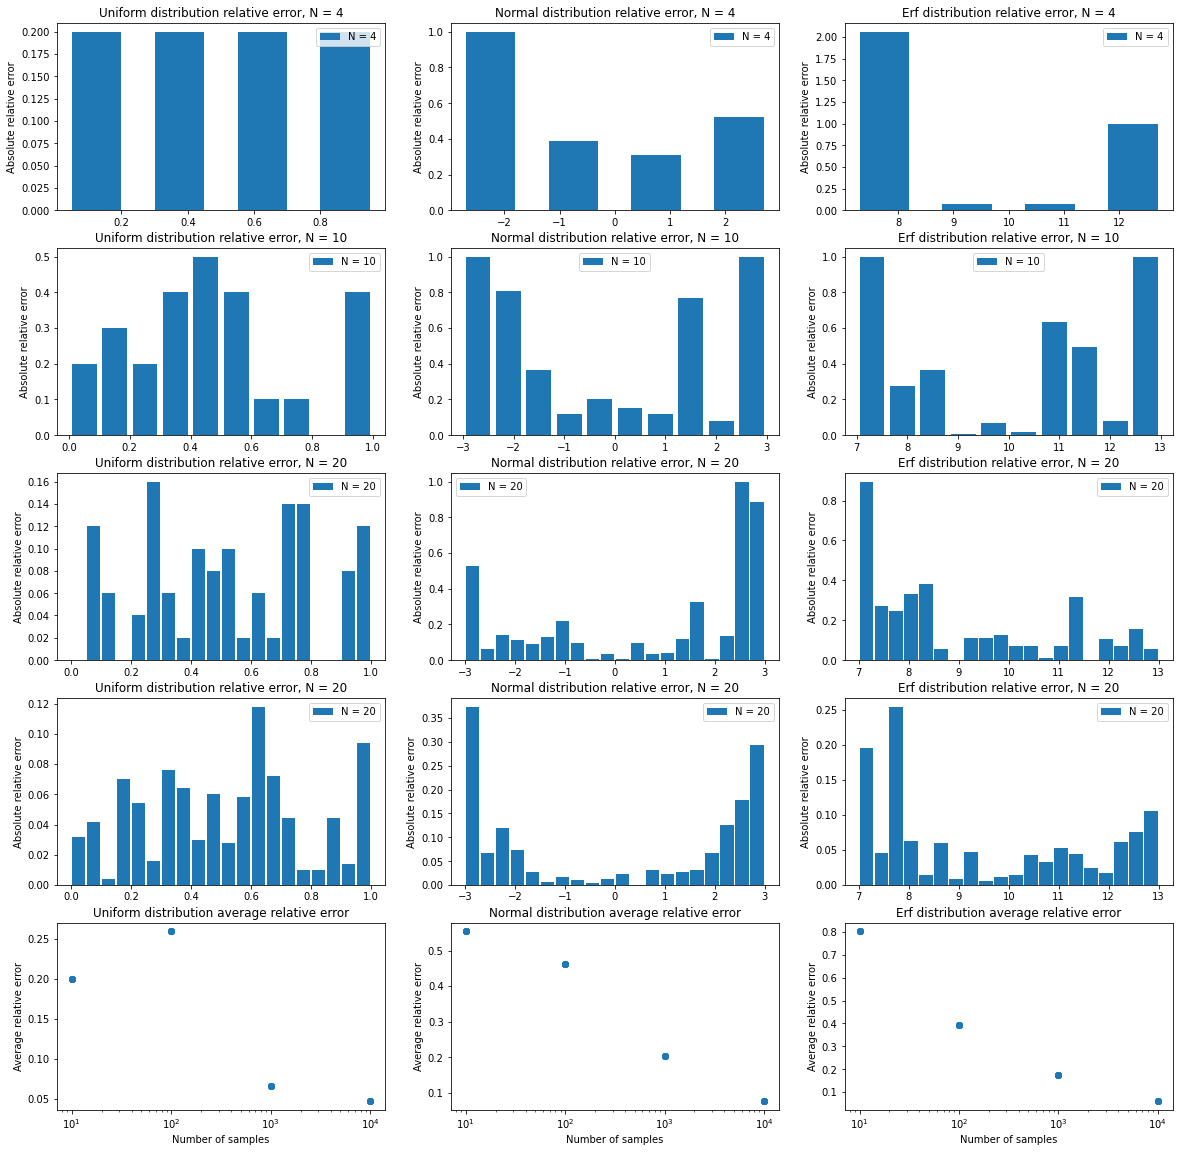

In [5]:
fig, ax = plt.subplots(5, 3, figsize=(20,20), facecolor="white")

def plot_bar(rel_diff, plot):
    n_bins = len(rel_diff[2])
    bins = [(rel_diff[2][j]+rel_diff[2][j+1])/2 for j in range(n_bins-1)]
    total_range = max(bins)-min(bins)
    bar_width = total_range/n_bins
    plot.bar(bins, rel_diff[0], width=bar_width, label=f'N = {len(rel_diff[0])}')
    plot.set_title(f'{rel_diff[3]} relative error, N = {len(rel_diff[0])}')
    plot.set_ylabel('Absolute relative error')
    plot.legend()

for i in range(4):
    for rel_diff, j in zip([uniform_rel_diff, normal_rel_diff, erf_rel_diff], range(3)):
        plot_bar(rel_diff[i], ax[i][j])
        average_rel_diff = [sum(rel_diff[k][0])/len(rel_diff[k][0]) for k in range(4)]
        ax[4][j].plot([10, 100, 1000, 10000], average_rel_diff, 'o', color='tab:blue')
        ax[4][j].set_xscale('log')
        ax[4][j].set_ylabel('Average relative error')
        ax[4][j].set_xlabel('Number of samples')
        ax[4][j].set_title(f'{rel_diff[i][3]} average relative error')

plt.savefig("relative_diff.png")

# Exercício 2

In [6]:
averages = []
variances = []
avg_averages = []
avg_variances = []

t = 10000

for i in range(t):
    normal_samples = normal_sampler.sample(10)
    normal_samples.set_moments()
    averages.append(normal_samples.average)
    variances.append(normal_samples.variance)
    avg_averages.append((sum(averages))/len(averages))
    avg_variances.append((sum(variances))/len(variances))


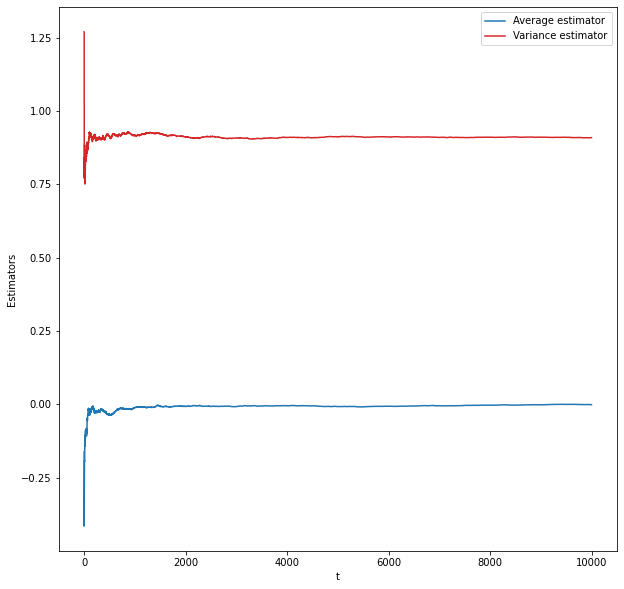

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,10), facecolor="white")

ax.plot(range(t), avg_averages, label='Average estimator')
ax.plot(range(t), avg_variances, label='Variance estimator', color='tab:red')
ax.set_ylabel('Estimators')
ax.set_xlabel('t')
ax.legend()


We can see that the variance estimator is clearly biased.

# Exercício 3

In [8]:
N = [10**(i+1) for i in range(3)]
skews = []
curtosis = []

for n in N:
    erf_samples = erf_sampler.sample(n)
    erf_samples.set_moments()
    skews.append(erf_samples.skew)
    curtosis.append(erf_samples.curtosis)

In [9]:
for i in range(len(N)):
    print(f"{skews[i]:+.4f} {curtosis[i]:+.4f} {N[i]}")

-0.2453 -1.0012 10
-0.0480 -0.2378 100
-0.1368 -0.0279 1000


Ambos se estabilizam em até duas casas decimais em N = 1000000.

# Exercício 4

## a)

In [10]:
N = [10**(i+1) for i in range(3)]
covariance_1 = []
correlation_1 = []

for n in N:
    uniform_samples = uniform_sampler.sample(n)
    normal_samples = normal_sampler.sample(n)
    xy_1 = Data([uniform_samples.data, normal_samples.data])
    xy_1.set_cov()
    covariance_1.append(xy_1.covariance)
    correlation_1.append(xy_1.correlation)

for i in range(len(N)):
    print(f"{covariance_1[i]:+.4f} {correlation_1[i]:+.4f} {N[i]}")

+0.0342 +0.2225 10
+0.0075 +0.0319 100
+0.0083 +0.0293 1000


Ambos se estabilizam em até duas casas decimais em N = 10000.

## b)

In [11]:
covariance_2 = []
correlation_2 = []

for n in N:
    uniform_samples = uniform_sampler.sample(n)
    normal_samples = normal_sampler.sample(n)
    xy_2 = Data([uniform_samples.data, [uniform_samples.data[i] + normal_samples.data[i] for i in range(n)]])
    xy_2.set_cov()
    covariance_2.append(xy_2.covariance)
    correlation_2.append(xy_2.correlation)    

for i in range(len(N)):
    print(f"{covariance_2[i]:+.4f} {correlation_2[i]:+.4f} {N[i]}")

+0.2414 +0.8322 10
+0.1390 +0.4894 100
+0.0936 +0.3083 1000


In [12]:
covariance_3 = []
correlation_3 = []

for n in N:
    uniform_samples = uniform_sampler.sample(n)
    normal_samples = normal_sampler.sample(n)
    xy_3 = Data([uniform_samples.data, [-uniform_samples.data[i] + normal_samples.data[i] for i in range(n)]])
    xy_3.set_cov()
    covariance_3.append(xy_3.covariance)
    correlation_3.append(xy_3.correlation)    

for i in range(len(N)):
    print(f"{covariance_3[i]:+.4f} {correlation_3[i]:+.4f} {N[i]}")

+0.0050 +0.0202 10
-0.0636 -0.2226 100
-0.0843 -0.2887 1000


## c)

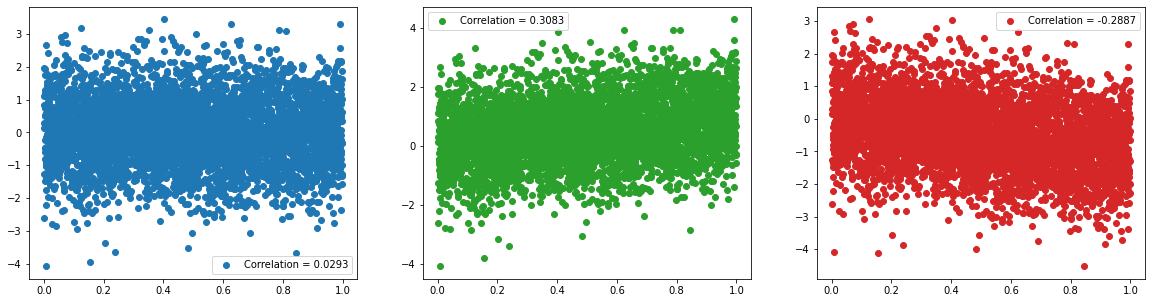

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20,5), facecolor="white")

n = 5000

uniform_samples = uniform_sampler.sample(n)
normal_samples = normal_sampler.sample(n)
xy_1 = Data([uniform_samples.data, normal_samples.data])
xy_2 = Data([uniform_samples.data, [uniform_samples.data[i] + normal_samples.data[i] for i in range(n)]])
xy_3 = Data([uniform_samples.data, [-uniform_samples.data[i] + normal_samples.data[i] for i in range(n)]])

ax[0].scatter(xy_1.data[0], xy_1.data[1], label=f'Correlation = {correlation_1[-1]:.4f}')
ax[1].scatter(xy_2.data[0], xy_2.data[1], label=f'Correlation = {correlation_2[-1]:.4f}', color='tab:green')
ax[2].scatter(xy_3.data[0], xy_3.data[1], label=f'Correlation = {correlation_3[-1]:.4f}', color='tab:red')
ax[0].legend()
ax[1].legend()
ax[2].legend()

# Exercício 5

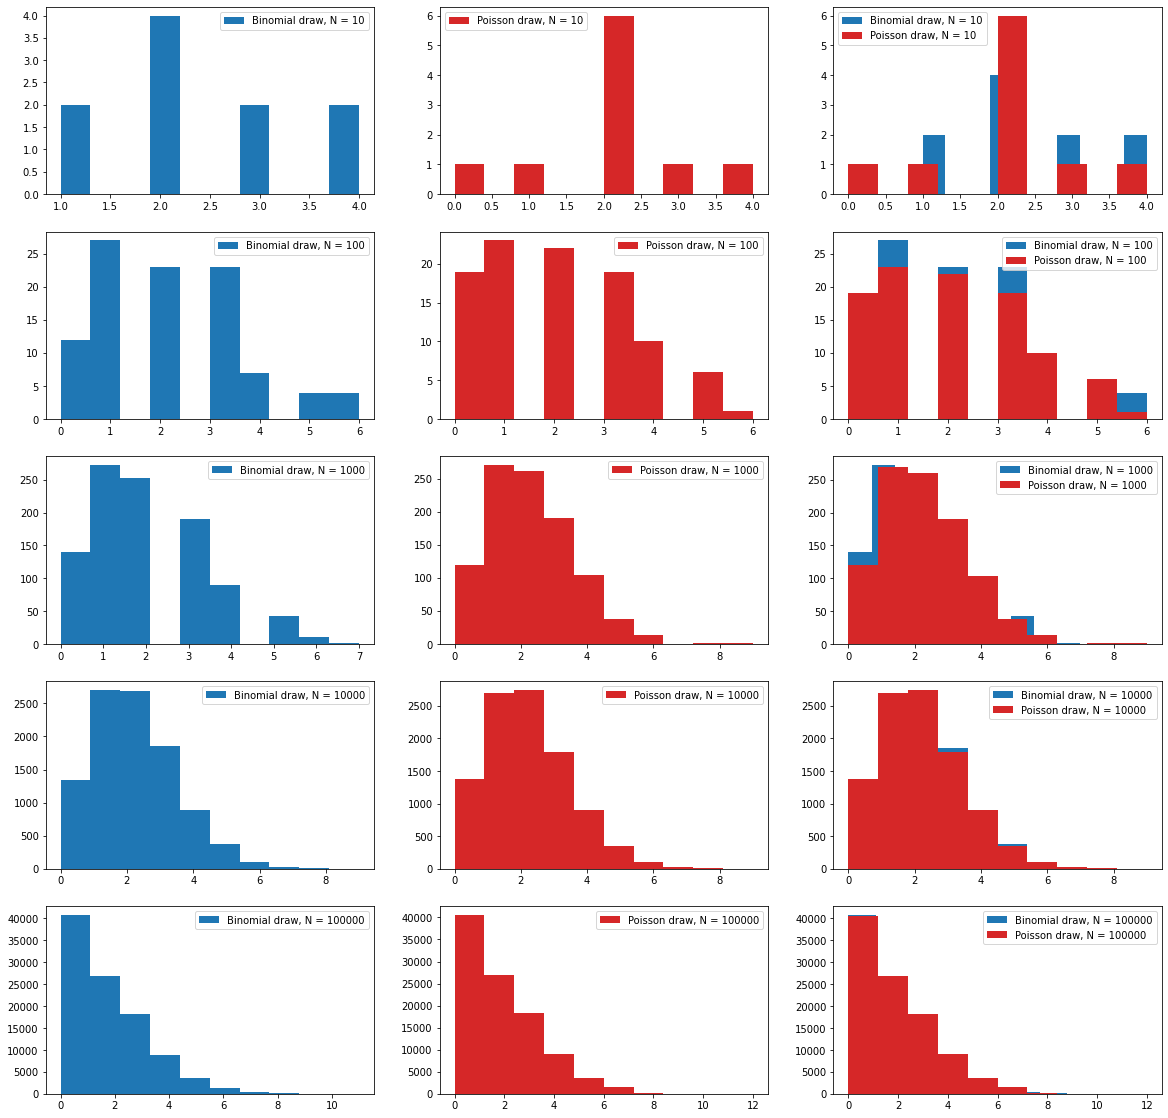

In [14]:
lam = 2
N = [10**(i+1) for i in range(5)]
fig, ax = plt.subplots(5, 3, figsize=(20,20), facecolor="white")

for i in range(5):
    n = 10**(i+1)
    p = lam/n
    binomial_draws = np.random.binomial(n, p, n)
    poisson_draws = np.random.poisson(lam, n)
    ax[i][0].hist(binomial_draws, label=f'Binomial draw, N = {n}')
    ax[i][1].hist(poisson_draws, label=f'Poisson draw, N = {n}', color='tab:red')
    ax[i][2].hist(binomial_draws, label=f'Binomial draw, N = {n}')
    ax[i][2].hist(poisson_draws, label=f'Poisson draw, N = {n}', color='tab:red')
    ax[i][0].legend()
    ax[i][1].legend()
    ax[i][2].legend()
    

### Exercício 6

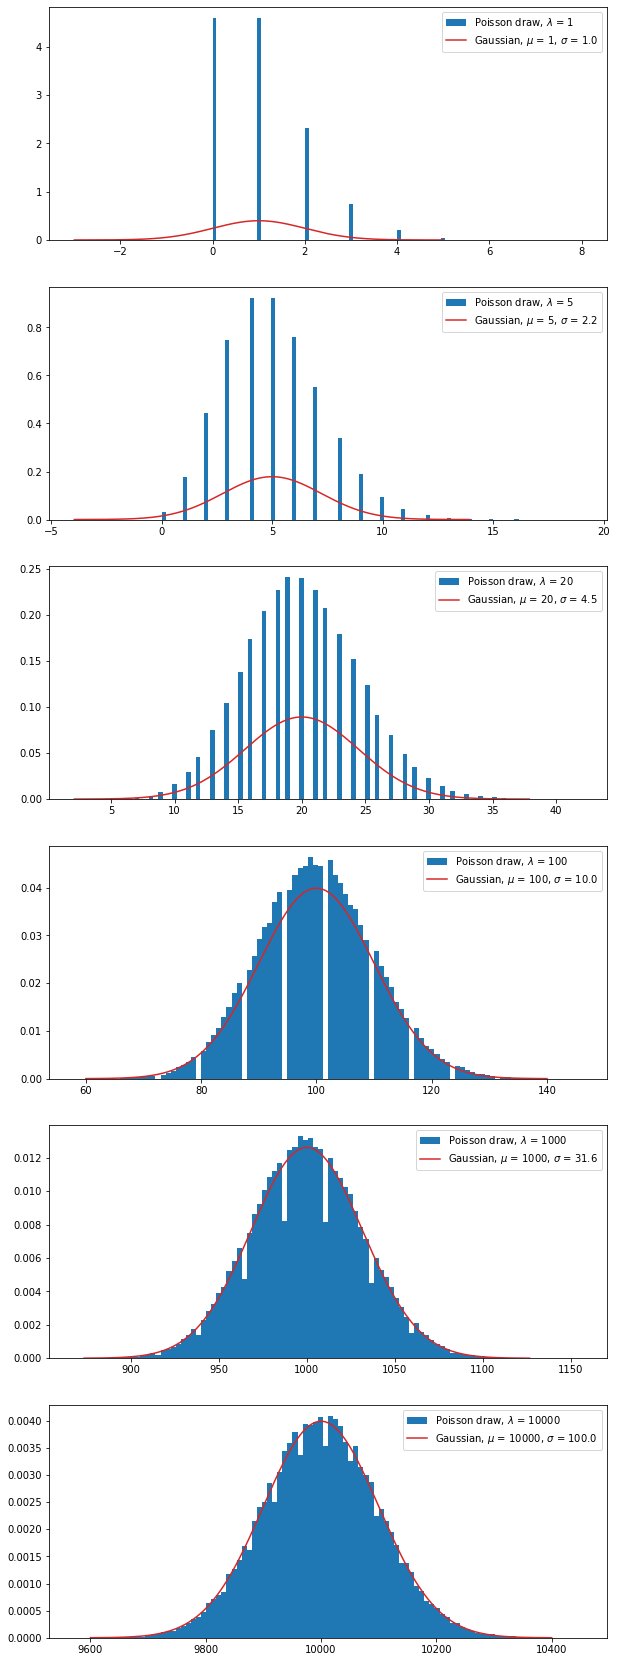

In [15]:
fig, ax = plt.subplots(6, 1, figsize=(10,30), facecolor="white")
lam = [1, 5, 20, 100, 1000, 10000]

for i in range(len(lam)):
    l = lam[i]
    x = np.linspace(l - l**0.5*4, l + l**0.5*4, 10000)
    poisson_draws = np.random.poisson(l, 100000)
    gaussian = [np.exp(-(xi-l)**2/2/l)/np.sqrt(2*np.pi)/l**0.5 for xi in x]
    ax[i].hist(poisson_draws, density=True, bins=100, label=f'Poisson draw, $\lambda$ = {l}')
    ax[i].plot(x, gaussian, label=f'Gaussian, $\mu$ = {l}, $\sigma$ = {l**0.5:.1f}', color='tab:red')
    ax[i].legend()

    

# Exercício 7

\begin{align}
    \mathcal{P}(n\sigma) &= \int_{\Omega_n} \mathcal{d}x \mathcal{d}y \mathcal{P}(x,y)  \\
    &= \int_{\Omega_n} \mathcal{d}x \mathcal{d}y \frac{e^{-\frac{1}{2} \left( \frac{x - \mu_x}{\sigma_x} \right)^2 - \frac{1}{2} \left( \frac{y - \mu_y}{\sigma_y} \right)^2}}{2\pi\sigma_x\sigma_y} 
\end{align}

Using the following substitutions,

\begin{align}
    \bar{x} &= \frac{x - \mu_x}{\sigma_x} & \mathcal{d}\bar{x} &= \frac{1}{\sigma_x} \mathcal{d}x  \\
    \bar{y} &= \frac{y - \mu_y}{\sigma_y} & \mathcal{d}\bar{y} &= \frac{1}{\sigma_y} \mathcal{d}y 
\end{align}

we end up with 

\begin{align}
    \mathcal{P}(n\sigma) &= \int_{\Omega_n} \mathcal{d}\bar{x} \mathcal{d}\bar{y} \frac{e^{-\frac{1}{2} (\bar{x}^2 + \bar{y}^2)}}{2\pi}
\end{align}

Which can easily be seen to become

\begin{align}
    \mathcal{P}(n\sigma) &= \int_0^n \int_0^{2\pi} \mathcal{d}\chi \mathcal{d}\theta \frac{\chi e^{- \frac{1}{2}\chi^2}}{2\pi} \\
    &= - e^{- \frac{1}{2}\chi^2} |_0^n = 1 - e^{-\frac{1}{2}n^2}
\end{align}

In [16]:
for ni in range(1,4):
    p = 1 - np.exp(-ni**2/2)
    print(f'Probability {ni}-sigma = {p:.4f}')


Probability 1-sigma = 0.3935
Probability 2-sigma = 0.8647
Probability 3-sigma = 0.9889


# Exercício 8

\begin{align}
    \mathcal{P}(n\Omega) &= \int_{\Omega_n}\mathcal{d}x\mathcal{d}y \frac{exp{\left\{ \frac{-1}{2(1-\rho^2)} \left[ \left( \frac{x -\mu_x}{\sigma_x} \right)^2 + \left( \frac{y -\mu_y}{\sigma_y} \right)^2 - 2 \rho \left( \frac{x -\mu_x}{\sigma_x} \right) \left( \frac{y -\mu_y}{\sigma_y} \right) \right] \right\}}}{2\pi\sigma_x\sigma_y\sqrt{1-\rho^2}}
\end{align}

Substituting $\bar{x}= \frac{x-\mu_x}{\sigma_x}$ and $\bar{y} = \frac{y-\mu_y}{\sigma_y}$:

\begin{align}
    \mathcal{P}(n\Omega) &= \int_{\Omega_n}\mathcal{d}\bar{x}\mathcal{d}\bar{y} \frac{exp{\left\{- \left[] \frac{\bar{x}^2 + \bar{y}^2 - 2\rho\bar{x}\bar{y}}{2\left(1-\rho^2\right)} \right] \right\} }}{2\pi\sqrt{1-\rho^2}}
\end{align}

The exponent can be seen as the result of a matrix multiplication:

\begin{align}
    \begin{pmatrix}
        \bar{x} & \bar{y}
    \end{pmatrix}

    \begin{pmatrix}
        1     & -\rho \\
        -\rho & 1
    \end{pmatrix}

    \begin{pmatrix}
        \bar{x} \\
        \bar{y}
    \end{pmatrix}

    = \bar{x}^2 + \bar{y}^2 - 2\rho\bar{x}\bar{y}
\end{align}

The eigenvectors of the middle matrix give us new variables in which the exponent is diagonalized, namely $u = (x-y)/\sqrt{2}$ and $ v = (x+y)/\sqrt{2} $. The jacobian of this variable transformation can easily be seen to equal 1. Hence

\begin{align}
    \mathcal{P}(n\Omega) &= \int_{\Omega_n} \mathcal{d}u \mathcal{d}v \frac{exp{\left\{- \left[ \frac{u^2 \left( 1+ \rho \right) + v^2\left(1-\rho\right)}{2\sqrt{1-\rho^2}} \right] \right\} }}{2\pi\sqrt{1-\rho^2}}
\end{align}

Substituting then $ \bar{u} = u/\sqrt{1-\rho} $ and $ \bar{v} = v/\sqrt{1+\rho} $

\begin{align}
    \mathcal{P}(n\Omega) &= \int_{\Omega_n} \mathcal{d}\bar{u} \mathcal{d}\bar{v} \frac{exp \left[- \frac{1}{2}\left(\bar{u}^2 + \bar{v}^2\right) \right]}{2\pi} = \int_0^{r_n} \mathcal{d} r r e^{- \frac{r^2}{2}}
\end{align}


where $ r = \chi/\sqrt{1 - \rho^2} $. Finally:

\begin{align}
    \mathcal{P} (n\Omega) &= - e^{- \frac{1}{2}r^2} |_0^{n/\sqrt{1 - \rho^2}} = 1 - e^{-\frac{n^2}{2(1-\rho^2)}}
\end{align}


In [17]:
rho = 0.5

for ni in range(1,4):
    p = 1 - np.exp(-ni**2/2/(1-rho**2))
    print(f'Probability {ni}-sigma = {p:.4f}')


Probability 1-sigma = 0.4866
Probability 2-sigma = 0.9305
Probability 3-sigma = 0.9975


# Exercício 9

## a)

In [18]:
# Create data
uniform_samples = [uniform_sampler.sample(10), uniform_sampler.sample(100), uniform_sampler.sample(1000), uniform_sampler.sample(10000)]
normal_samples = [normal_sampler.sample(10), normal_sampler.sample(100), normal_sampler.sample(1000), normal_sampler.sample(10000)]
erf_samples = [erf_sampler.sample(10), erf_sampler.sample(100), erf_sampler.sample(1000), erf_sampler.sample(10000)]

# Prepare data
for samples in [uniform_samples, normal_samples, erf_samples]:
    for i in range(len(samples)):
        samples[i].set_moments()


In [19]:
# Calculating estimators for N=1000 samples
# Estimator 1
for samples in [uniform_samples, normal_samples, erf_samples]:
    print(f'Estimator 1: x = {samples[2].average:.4f}')
print()

Estimator 1: x = 0.5013
Estimator 1: x = 0.0519
Estimator 1: x = 9.9447



In [20]:
# Estimator 2
for samples in [uniform_samples, normal_samples, erf_samples]:
    x = sum(samples[2].data[:10])/10
    print(f'Estimator 2: x = {x:.4f}')


Estimator 2: x = 0.5241
Estimator 2: x = 0.0867
Estimator 2: x = 9.5953


In [21]:
# Estimator 3
for samples in [uniform_samples, normal_samples, erf_samples]:
    x = sum(samples[2].data)/(samples[2].N - 1)
    print(f'Estimator 3: x = {x:.4f}')

Estimator 3: x = 0.5018
Estimator 3: x = 0.0519
Estimator 3: x = 9.9546


In [22]:
# Estimator 4
for samples in [uniform_samples, normal_samples, erf_samples]:
    print(f'Estimator 4: x = 1.8')

Estimator 4: x = 1.8
Estimator 4: x = 1.8
Estimator 4: x = 1.8


In [23]:
# Calculating estimators for N=100 samples
# Estimator 5
for samples in [uniform_samples, normal_samples, erf_samples]:
    x = prod(samples[1].data)**(1/samples[1].N)
    print(f'Estimator 5: x = {x:.4f}')

Estimator 5: x = 0.3781
Estimator 5: x = 0.4929
Estimator 5: x = 9.9121


In [24]:
# Since this is a continuous distribution and finding two or more equal 
# values is basically impossible, I'll bin the data and return the highetst bin
# Estimator 6
uniform_samples[2].set_bins(0, 1, 100)
normal_samples[2].set_bins(-3, 3, 100)
erf_samples[2].set_bins(x0-3*sigma, x0+3*sigma, 100)

for samples in [uniform_samples, normal_samples, erf_samples]:
    max_hist = max(samples[2].histogram)
    i = np.where(samples[2].histogram == max_hist)[0][0]
    mode = samples[2].bins[i] 
    print(f'Estimator 6: x = {mode:.4f}')

Estimator 6: x = 0.3700
Estimator 6: x = 0.0000
Estimator 6: x = 10.3000


In [25]:
# Estimator 7
for samples in [uniform_samples, normal_samples, erf_samples]:
    x = (min(samples[2].data) + max(samples[2].data))/2
    print(f'Estimator 7: x = {x:.4f}')

Estimator 7: x = 0.4995
Estimator 7: x = -0.2018
Estimator 7: x = 9.6876


In [26]:
# Estimator 8
for samples in [uniform_samples, normal_samples, erf_samples]:
    x = sum(samples[2].data[::2])/samples[2].N*2 if samples[2].N % 2 == 0 else sum(samples[2].data[::2])/(samples[2].N-1)*2
    print(f'Estimator 8: x = {x:.4f}')

Estimator 8: x = 0.5136
Estimator 8: x = 0.0806
Estimator 8: x = 9.9662


## b)

# Exercício 10

## a)

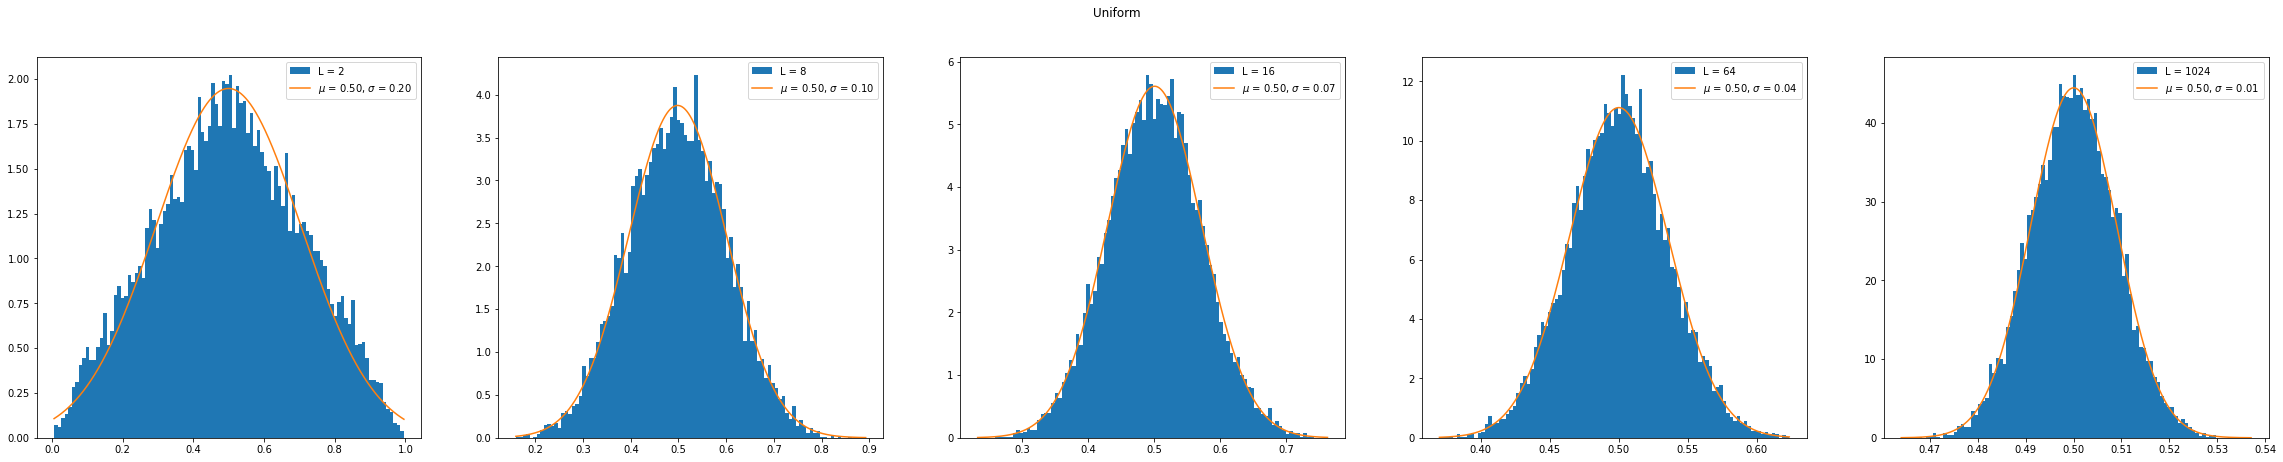

In [27]:
fig, ax = plt.subplots(1, 5, figsize=(40,7), facecolor="white")

fig.suptitle('Uniform')

L = [2, 8, 16, 64, 1024]
N = 10000

for i in range(len(L)):
    samples = [np.random.uniform(0, 1, N) for a in range(L[i])]
    z = []
    for j in range(N):
        s = 0
        for k in range(L[i]):
            s += samples[k][j]
        s /= L[i]
        z.append(s)
    avg = sum(z)/len(z)
    sigma = np.sqrt(sum([(zi-avg)**2/len(z) for zi in z]))
    x = np.linspace(min(z), max(z), 10000)
    ax[i].hist(z, bins=100, density=True, label=f'L = {L[i]}')
    ax[i].plot(x, stats.norm.pdf(x, avg, sigma), label=f'$\mu$ = {avg:.2f}, $\sigma$ = {sigma:.2f}')
    ax[i].legend()

## b)

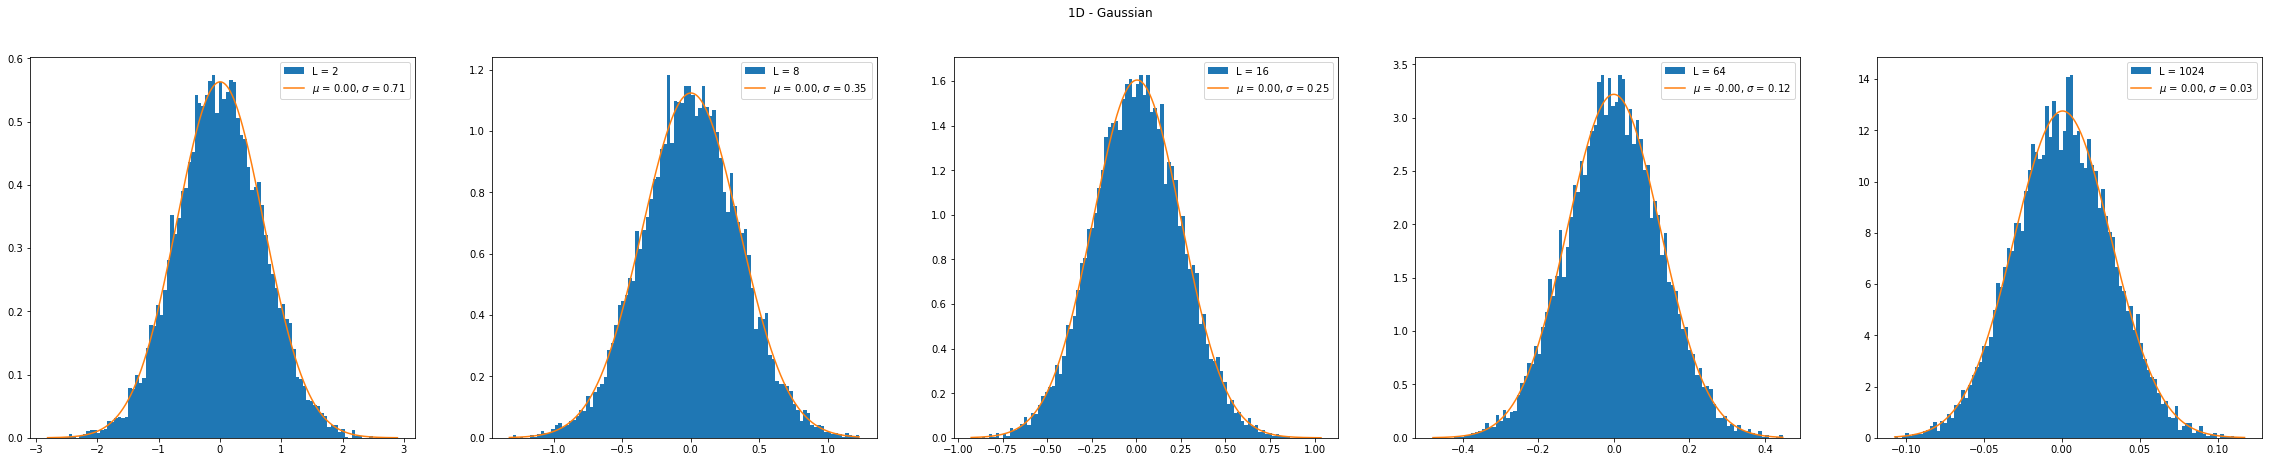

In [28]:
fig, ax = plt.subplots(1, 5, figsize=(40,7), facecolor="white")

fig.suptitle('1D - Gaussian')

L = [2, 8, 16, 64, 1024]
N = 10000

for i in range(len(L)):
    samples = [np.random.normal(0, 1, N) for a in range(L[i])]
    z = []
    for j in range(N):
        s = 0
        for k in range(L[i]):
            s += samples[k][j]
        s /= L[i]
        z.append(s)
    min_z = min(z)
    max_z = max(z)
    avg = sum(z)/len(z)
    sigma = np.sqrt(sum([(zi-avg)**2/len(z) for zi in z]))
    x = np.linspace(min_z, max_z, 10000)
    ax[i].hist(z, bins=100, density=True, label=f'L = {L[i]}')
    ax[i].plot(x, stats.norm.pdf(x, avg, sigma), label=f'$\mu$ = {avg:.2f}, $\sigma$ = {sigma:.2f}')
    ax[i].legend()

## c)

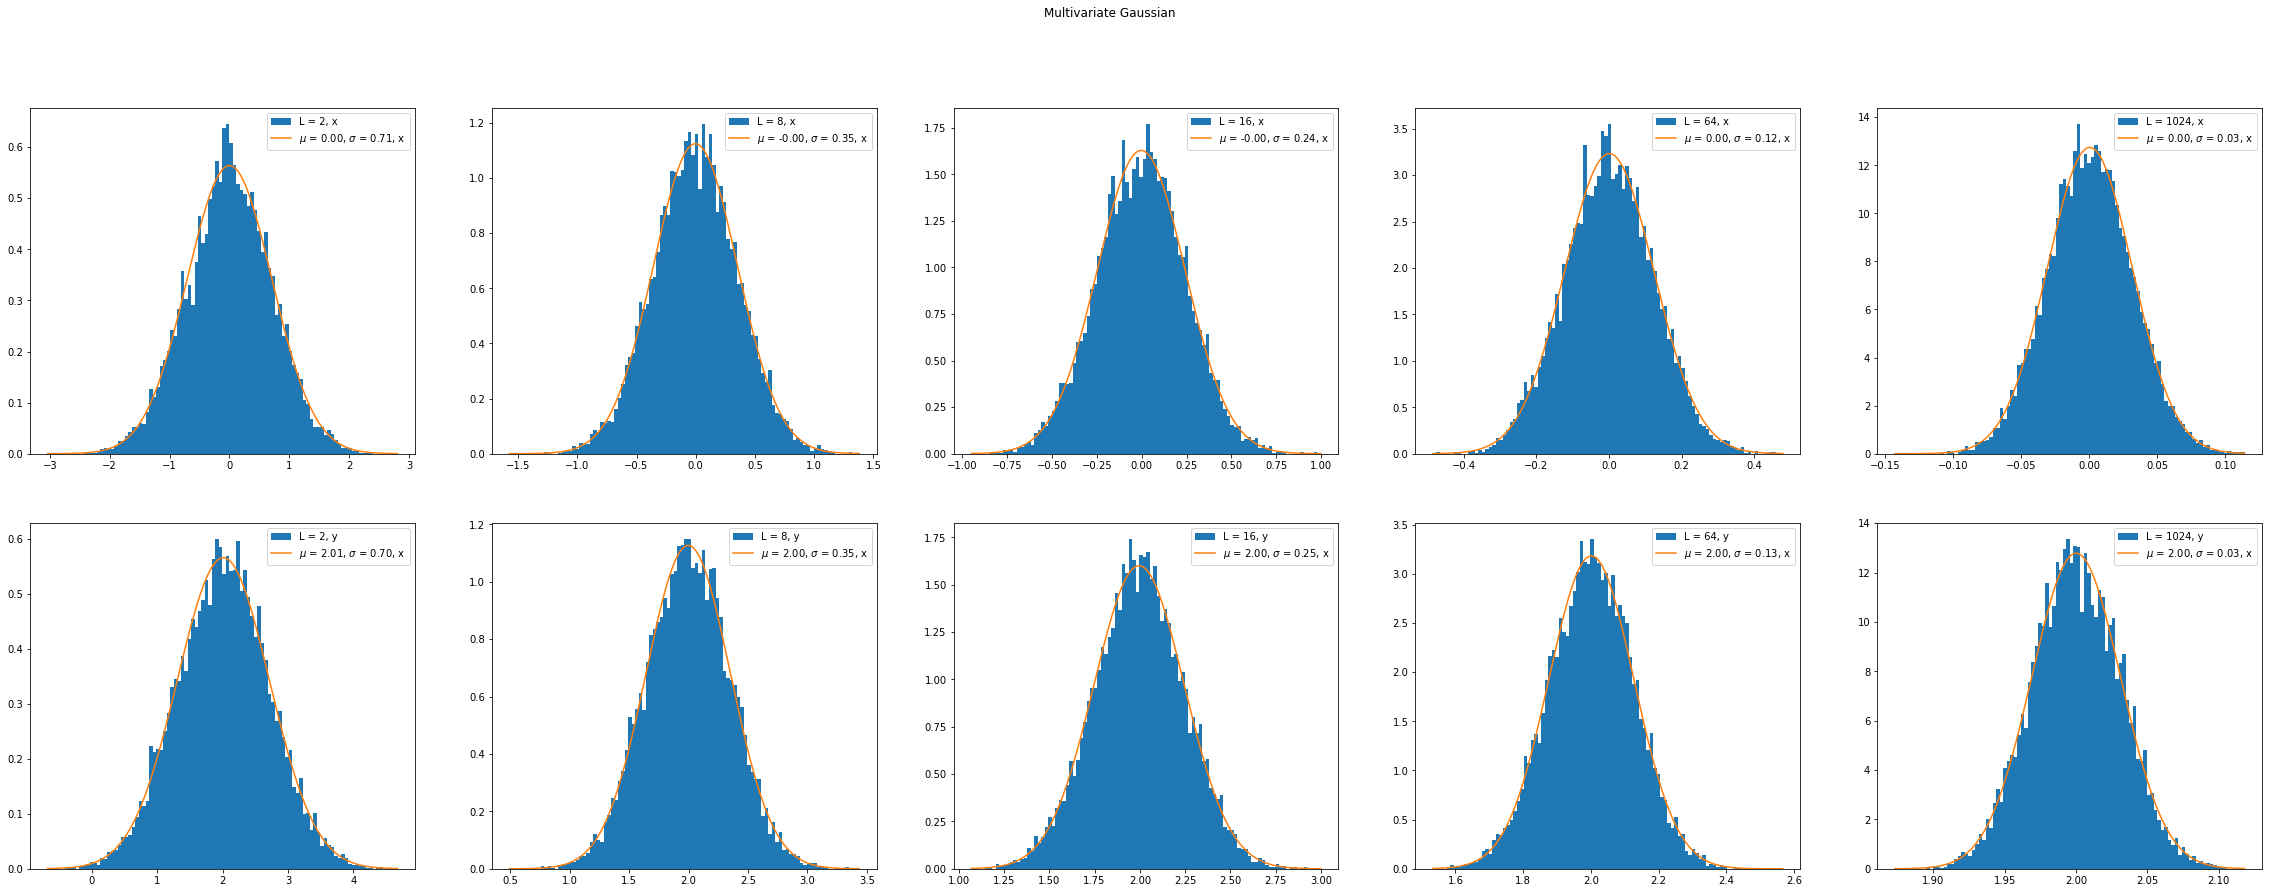

In [29]:
fig, ax = plt.subplots(2, 5, figsize=(40,14), facecolor="white")

fig.suptitle('Multivariate Gaussian')

L = [2, 8, 16, 64, 1024]
N = 10000

for i in range(len(L)):
    samples = [np.random.multivariate_normal([0,2], [[1, 0.5],[0.5, 1]], N) for a in range(L[i])]
    z = []
    for j in range(N):
        x = sum([samples[k][j][0] for k in range(L[i])])/L[i]
        y = sum([samples[k][j][1] for k in range(L[i])])/L[i]
        z.append([x, y])
    x = [zi[0] for zi in z]
    y = [zi[1] for zi in z]
    avg = [sum([xi for xi in x])/len(x), sum([yi for yi in y])/len(y)]
    sigma = [np.sqrt(sum([(xi - avg[0])**2/len(x) for xi in x])), np.sqrt(sum([(yi - avg[1])**2/len(y) for yi in y]))]

    a = np.linspace(min(x), max(x), 10000)
    b = np.linspace(min(y), max(y), 10000)

    ax[0][i].hist(x, bins=100, density=True, label=f'L = {L[i]}, x')
    ax[0][i].plot(a, stats.norm.pdf(a, avg[0], sigma[0]), label=f'$\mu$ = {avg[0]:.2f}, $\sigma$ = {sigma[0]:.2f}, x')
    ax[0][i].legend()
    ax[1][i].hist(y, bins=100, density=True, label=f'L = {L[i]}, y')
    ax[1][i].plot(b, stats.norm.pdf(b, avg[1], sigma[1]), label=f'$\mu$ = {avg[1]:.2f}, $\sigma$ = {sigma[1]:.2f}, x')
    ax[1][i].legend()
    
